In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from matplotlib import style
from matplotlib import pyplot as plt

In [ ]:
!pip install statsmodels

In [116]:
missing_values=["n/a","na","-200"]
df=pd.read_csv('tempfile1.csv', na_values=missing_values,parse_dates=[['Date', 'Time']])
df.head(10)

,Date_Time,Unnamed: 0,CO(GT)
0,2004-03-10 18:00:00,0,2.6
1,2004-03-10 19:00:00,1,2.0
2,2004-03-10 20:00:00,2,2.2
3,2004-03-10 21:00:00,3,2.2
4,2004-03-10 22:00:00,4,1.6
5,2004-03-10 23:00:00,5,1.2
6,2004-03-11 00:00:00,6,1.2
7,2004-03-11 01:00:00,7,1.0
8,2004-03-11 02:00:00,8,0.9
9,2004-03-11 03:00:00,9,0.6


In [119]:
mean = df['CO(GT)'].mean()
df['CO(GT)'].fillna(mean, inplace=True)

In [120]:
df['CO(GT)'].isnull().sum()

0

In [121]:
df['Date_Time']=pd.to_datetime(df['Date_Time'],infer_datetime_format=True)
indexedDataset=df.set_index(['Date_Time'])

In [122]:
from datetime import datetime
indexedDataset.head()

,Unnamed: 0,CO(GT)
Date_Time,,
2004-03-10 18:00:00,0,2.6
2004-03-10 19:00:00,1,2.0
2004-03-10 20:00:00,2,2.2
2004-03-10 21:00:00,3,2.2
2004-03-10 22:00:00,4,1.6


In [123]:
indexedDataset=indexedDataset.drop(columns=['Unnamed: 0'])

In [124]:
indexedDataset.head()

,CO(GT)
Date_Time,
2004-03-10 18:00:00,2.6
2004-03-10 19:00:00,2.0
2004-03-10 20:00:00,2.2
2004-03-10 21:00:00,2.2
2004-03-10 22:00:00,1.6


In [167]:
ts_log =indexedDataset #np.log(indexedDataset)

In [168]:
ts_log

,CO(GT)
Date_Time,
2004-03-10 18:00:00,2.6
2004-03-10 19:00:00,2.0
2004-03-10 20:00:00,2.2
2004-03-10 21:00:00,2.2
2004-03-10 22:00:00,1.6
...,...
2005-04-04 10:00:00,3.1
2005-04-04 11:00:00,2.4
2005-04-04 12:00:00,2.4


In [169]:
train=ts_log[0:7000] 
test=ts_log[7000:]

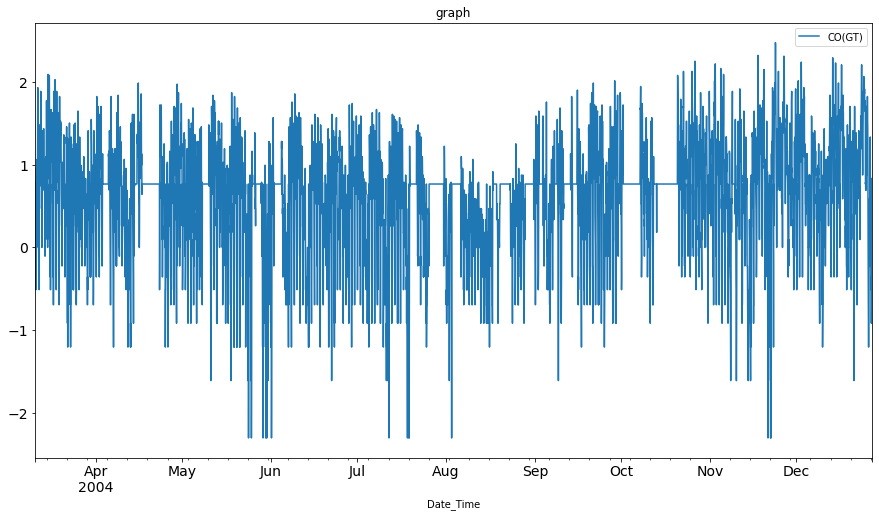

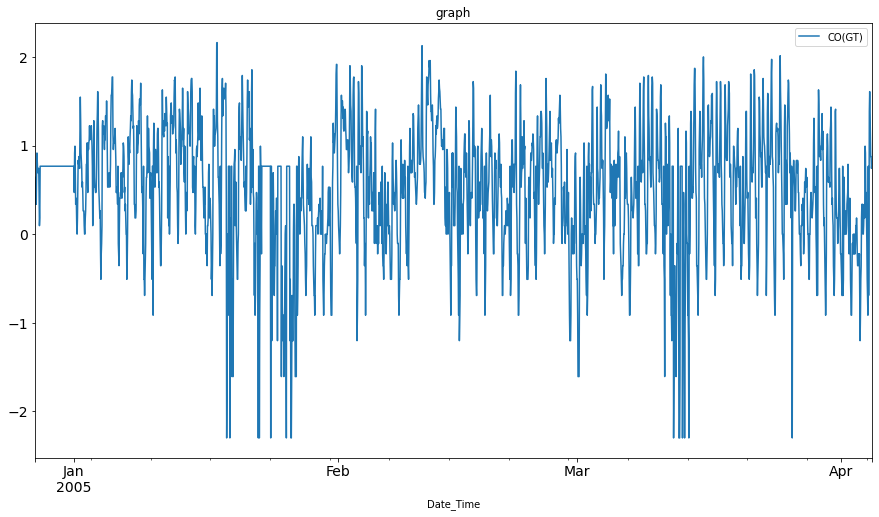

In [128]:
#Plotting data
train.plot(figsize=(15,8), title= 'graph', fontsize=14)
test.plot(figsize=(15,8), title= 'graph', fontsize=14)
plt.show()

In [144]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(indexedDataset.index, indexedDataset["CO(GT)"], test_size=0.2)

In [145]:
from sklearn.ensemble.forest import RandomForestRegressor

RF_Model = RandomForestRegressor(n_estimators=100,
                                 max_features=1, oob_score=True)

# let's get the labels and features in order to run our 
# model fitting
labels = y_train#[:, None]
features = X_train[:, None]

# Fit the RF model with features and labels.
rgr=RF_Model.fit(features, labels)

C:\Users\raypr\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Support for multi-dimensional indexing (e.g. `index[:, None]`) on an Index is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':


In [146]:
X_train,X_train_predict

(DatetimeIndex(['2004-05-03 19:00:00', '2005-02-16 16:00:00',
                '2004-11-27 04:00:00', '2004-11-18 02:00:00',
                '2004-12-11 00:00:00', '2005-02-10 14:00:00',
                '2004-12-04 00:00:00', '2004-03-29 00:00:00',
                '2004-12-07 01:00:00', '2004-08-15 10:00:00',
                ...
                '2004-03-30 04:00:00', '2005-02-28 14:00:00',
                '2004-06-27 23:00:00', '2004-06-04 04:00:00',
                '2005-02-19 16:00:00', '2004-09-17 16:00:00',
                '2005-02-22 12:00:00', '2004-07-06 11:00:00',
                '2004-03-15 05:00:00', '2005-03-26 18:00:00'],
               dtype='datetime64[ns]', name='Date_Time', length=7485, freq=None),
 Empty DataFrame
 Columns: []
 Index: [1.0360000000000003, 1.9059999999999981, 2.253999999999998, 3.239000000000002, 0.8139999999999987, 1.0940000000000012, 2.0880000000000023, 2.914000000000001, 5.320000000000004, 3.171, 2.317000000000003, 1.4449999999999996, 2.29799999999999

In [147]:
from sklearn.metrics import accuracy_score
y_test = y_test[:, None]

In [148]:
X_test = X_test[:, None]

C:\Users\raypr\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Support for multi-dimensional indexing (e.g. `index[:, None]`) on an Index is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [149]:
y_pred=rgr.predict(X_test)

In [150]:
y_pred

array([1.233, 1.826, 0.906, ..., 1.977, 2.607, 0.969])

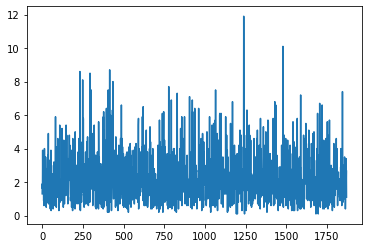

In [154]:
plt.plot(y_test)
plt.show()

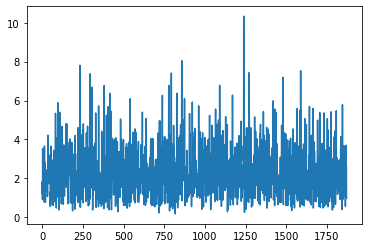

In [153]:
plt.plot(y_pred)
plt.show()

In [132]:
ts_log.isnull().sum()

CO(GT)    0
dtype: int64

In [133]:
ts_log_diff = ts_log - ts_log.shift()

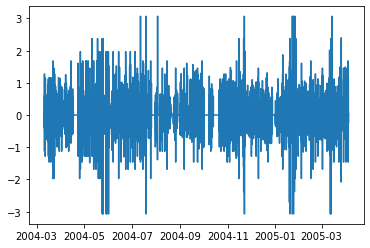

In [134]:
plt.plot(ts_log_diff)

C:\Users\raypr\miniconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


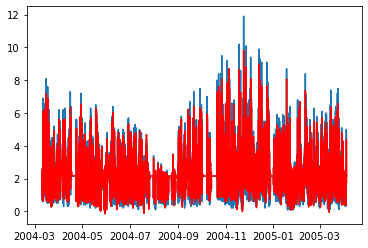

In [266]:
model = ARIMA(ts_log, order=(9,0, 1))  
results_ARIMA = model.fit()  
plt.plot(ts_log)
plt.plot(results_ARIMA.fittedvalues, color='red')
pred=results_ARIMA.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [267]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, pred)
error

0.5344508756039105

In [262]:
pred

2004-12-27 10:00:00    2.336320
2004-12-27 11:00:00    1.870614
2004-12-27 12:00:00    1.701012
2004-12-27 13:00:00    1.563880
2004-12-27 14:00:00    1.627632
                         ...   
2005-04-04 10:00:00    2.954320
2005-04-04 11:00:00    2.668432
2005-04-04 12:00:00    2.201311
2005-04-04 13:00:00    2.150846
2005-04-04 14:00:00    1.768638
Freq: H, Length: 2357, dtype: float64

In [180]:
test

,CO(GT)
Date_Time,
2004-12-27 10:00:00,1.9
2004-12-27 11:00:00,1.6
2004-12-27 12:00:00,1.4
2004-12-27 13:00:00,1.5
2004-12-27 14:00:00,1.4
...,...
2005-04-04 10:00:00,3.1
2005-04-04 11:00:00,2.4
2005-04-04 12:00:00,2.4


6.706384404550324